<center>
<h1>
<b> EMPLOYEE ATTRITION ANALYSIS </b>
</h1>
</center>

<h3>
<center>
Domain: Human Resource <br>
Dataset Source: Unified Mentor <br>
<i>Author: Bunty Patil <br>
</center>
</h3>

 **Problem Statement**:
 
XYZ company which was established a few years back is facing around a 15% attrition rate for a couple of years. And it's majorly affecting the company in many aspects. In order to understand why employees are leaving the company and reduce the attrition rate XYZ company has approached an HR analytics consultancy for analyzing the data they have.

In [1]:
# Importing required libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
# Importing Dataset using pandas 
employee_df = pd.read_csv('Attrition_data.csv')

In [3]:
employee_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Basic Data Exploration

In [4]:
# Let's check the shape of dataset
employee_df.shape

(4410, 29)

So, our dataset consists of 4410 rows and 29 columns

In [5]:
# Getting all columns name
employee_df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [6]:
# Checking non-null counts and data types of all columns
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

As seen above, it is not required to change the data type of any column because all columns have the correct data types as per their values but we can also see that `NumCompaniesWorked`,`EnvironmentSatisfaction`, `JobSatisfaction`, and `WorkLifeBalance` columns have some null values.

Let's check the null values in all columns

In [7]:
employee_df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

As we can see that our null values in all columns are not in huge numbers and their are multiple columns by which we can carry out our analysis. So, as per now we are keeping the null values as it is.

### Dropping columns

In employee_df dataframe, `Over18`, `StandardHours`, and `EmployeeCount` columns have all same values. 

In [8]:
employee_df.Over18.value_counts()

Over18
Y    4410
Name: count, dtype: int64

In [9]:
employee_df.groupby('StandardHours').size()

StandardHours
8    4410
dtype: int64

In [10]:
employee_df.groupby('EmployeeCount').size()

EmployeeCount
1    4410
dtype: int64

We can drop these columns and some other columns as it will not help in our analysis.

In [11]:
employee_df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'StockOptionLevel', 'TrainingTimesLastYear', 'DistanceFromHome'], inplace=True)

In [12]:
# Setting EmployeeId column as an index 
#employee_df.set_index('EmployeeID', inplace=True)

In [13]:
employee_df.shape

(4410, 23)

### Removing Duplicates

In [14]:
print(employee_df.duplicated().value_counts())
employee_df.drop_duplicates(inplace=True)
print(len(employee_df))

False    4410
Name: count, dtype: int64
4410


Their are no duplicates to remove from our data.

## Analyzing Data

In [15]:
# Setting default styling to all charts
sns.set_style('darkgrid')
plt.rc('axes', titlesize=16)
plt.rcParams.update({'font.size': 12})

### `Descriptive Statistics`

In [16]:
# Statistics
employee_df.describe()

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,2.912925,2.063946,65029.312925,2.694830,15.209524,11.279936,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,1.023933,1.106689,47068.888559,2.498887,3.659108,7.782222,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### `Correlation`

In statistics, correlation measures the strength and direction of the relationship between two variables. It indicates how closely the movements of one variable are associated with the movements of another variable.

In [17]:
# Selecting only numeric columns from employee_df dataframe to find the correlation  
employee_df_numeric = employee_df.select_dtypes(include='number')
employee_df_numeric

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,2,1,131160,1.0,11,1.0,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,41890,0.0,23,6.0,5,1,4,3.0,2.0,4.0,2,4
2,3,32,4,4,193280,1.0,15,5.0,5,0,3,2.0,2.0,1.0,3,3
3,4,38,5,3,83210,3.0,11,13.0,8,7,5,4.0,4.0,3.0,2,3
4,5,32,1,1,23420,4.0,12,9.0,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,4,1,60290,3.0,17,10.0,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,4,1,26790,2.0,15,10.0,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,2,2,37020,0.0,20,5.0,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,2,1,23980,0.0,14,10.0,9,7,8,4.0,1.0,3.0,2,3


In [18]:
# Finding correlation in data
employee_df_corr = employee_df_numeric.corr()
employee_df_corr

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,1.000000,0.008649,-0.009680,-0.003303,0.007338,-0.001117,-0.004456,-0.001063,0.004086,0.000256,0.008579,0.000798,-0.001053,-0.001723,0.008591,-0.006892
Age,0.008649,1.000000,-0.035706,-0.002884,-0.044314,0.299243,-0.033137,0.680661,0.311309,0.216513,0.202089,0.010089,-0.003086,-0.021297,0.018196,-0.025563
Education,-0.009680,-0.035706,1.000000,0.045746,0.006410,-0.016250,-0.040531,-0.010717,0.006080,0.022490,0.005358,-0.045469,-0.004173,-0.006406,-0.018279,-0.035591
JobLevel,-0.003303,-0.002884,0.045746,1.000000,0.047316,-0.009875,0.010973,-0.036957,-0.064219,-0.060811,-0.055251,-0.024448,-0.018279,-0.027664,-0.012630,-0.002474
MonthlyIncome,0.007338,-0.044314,0.006410,0.047316,1.000000,-0.020726,0.004325,-0.033787,0.000995,0.065219,0.024304,-0.006006,0.005063,0.003572,0.023346,0.016093
NumCompaniesWorked,-0.001117,0.299243,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.238807,-0.117959,-0.036656,-0.109667,0.013007,-0.056230,-0.008714,0.027985,0.017819
PercentSalaryHike,-0.004456,-0.033137,-0.040531,0.010973,0.004325,0.030860,1.000000,-0.018736,-0.029707,-0.029542,-0.040864,0.000841,0.030808,-0.040601,-0.004658,0.773550
TotalWorkingYears,-0.001063,0.680661,-0.010717,-0.036957,-0.033787,0.238807,-0.018736,1.000000,0.627703,0.404444,0.458800,-0.002265,-0.016849,0.001119,0.006709,-0.001396
YearsAtCompany,0.004086,0.311309,0.006080,-0.064219,0.000995,-0.117959,-0.029707,0.627703,1.000000,0.618409,0.769212,0.000421,-0.002166,0.014704,0.008314,-0.011038
YearsSinceLastPromotion,0.000256,0.216513,0.022490,-0.060811,0.065219,-0.036656,-0.029542,0.404444,0.618409,1.000000,0.510224,0.015283,-0.016236,0.009234,0.025395,-0.020159


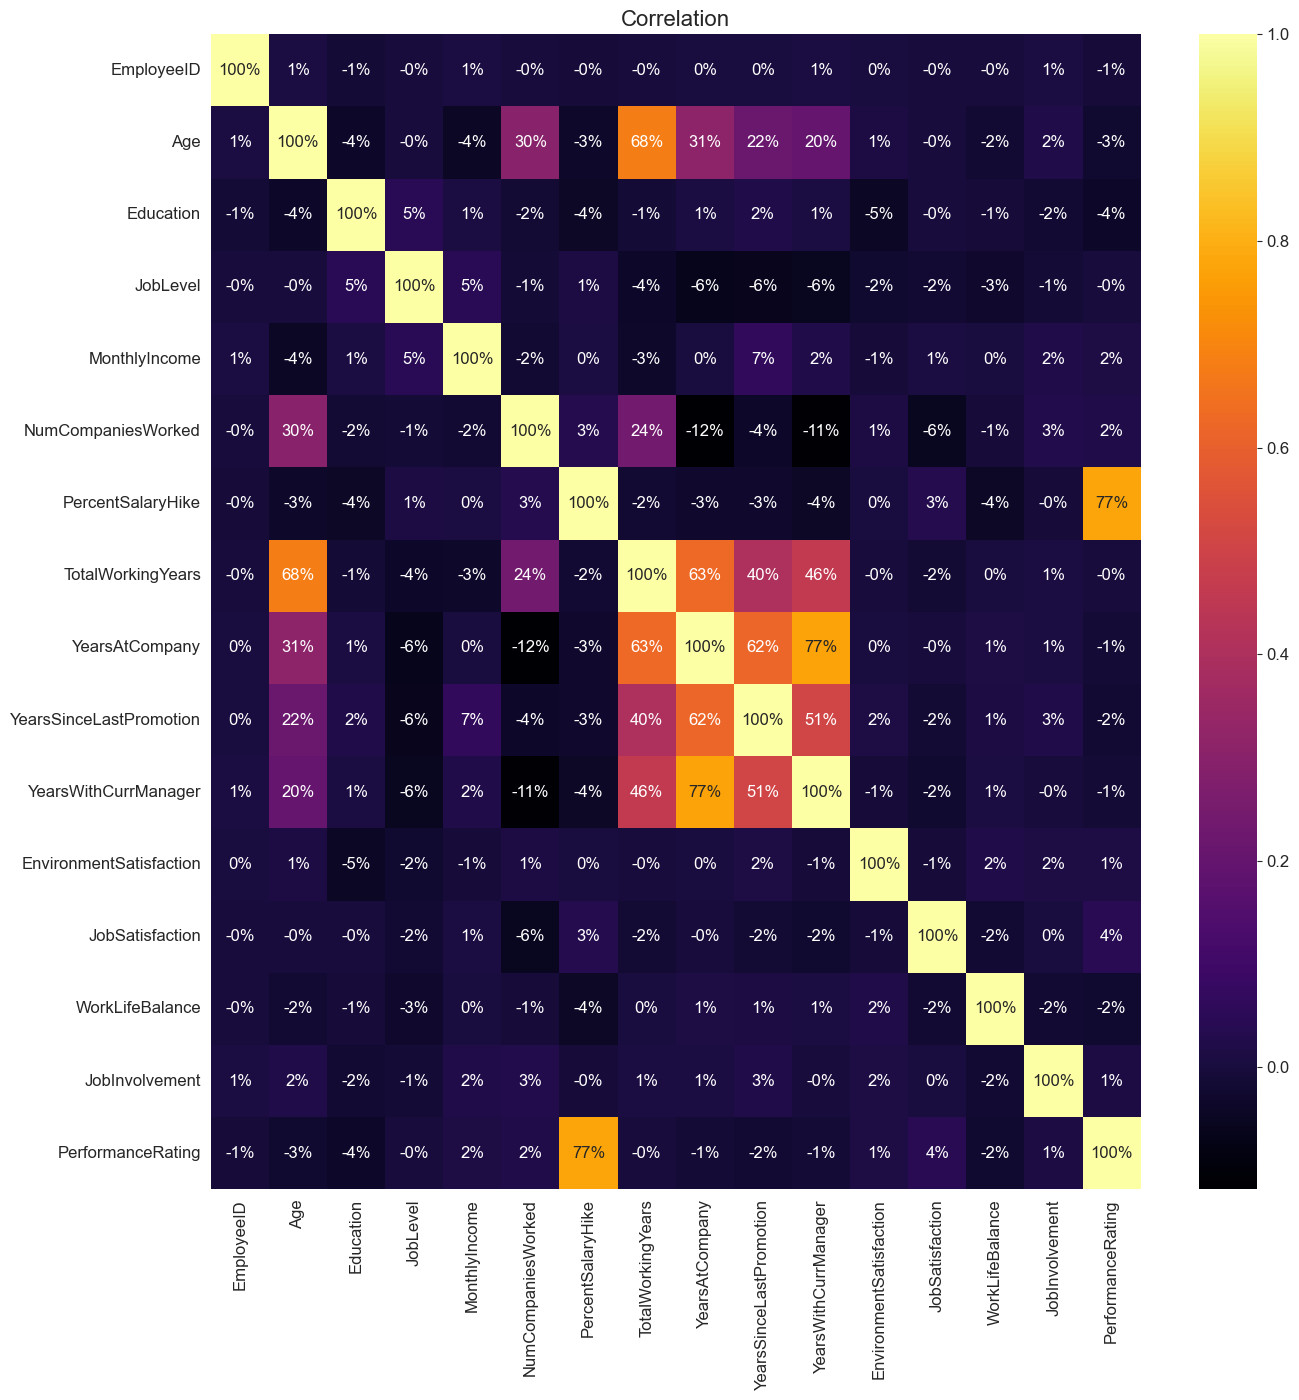

In [19]:
# Visualizing the correlation of the data using Heatmap.
plt.figure(figsize=(15,15))
plt.title('Correlation')
sns.heatmap(employee_df_corr,
            annot=True,
            fmt='.0%',
            cmap='inferno');

The heat map shows both, the Positive correlation and the Negative correlation.

The values which is between:
- 70% to 100% is having strong correlation
- 50% to 70% is having moderate correlation
- 30% to 50% is having weak correlation
- less than 30% is considered very weak correlation

Negative correlation: A negative correlation indicates a negative relationship, where one variable tends to decrease as the other increases.

## Frequency Distribution

Let's determine the frequency distribution for categorical variables such as `Attrition`, `Gender`, `BusinessTravel`, `Department`, `Education Field`, `Job Role`, and `MaritalStatus`

In [20]:
# Attrition Distribution
attrition_dist = round(employee_df.Attrition.value_counts(normalize=True) * 100, 2)
print('\nAttrition Distribution(%):')
print(attrition_dist)

# Gender Distribution
gender_dist = round(employee_df.Gender.value_counts(normalize=True) * 100, 2)
print('\nGender Distribution:')
print(gender_dist)

# Department Distribution
department_dist = round(employee_df.Department.value_counts(normalize=True) * 100, 2)
print('\nDepartment Distribution:')
print(department_dist)

# Business Travel Distribution
business_travel_dist = round(employee_df.BusinessTravel.value_counts(normalize=True) * 100, 2)
print('\nBusiness Travel Distribution:')
print(business_travel_dist)

# Marital Status Distribution
marital_dist = round(employee_df.MaritalStatus.value_counts(normalize=True) * 100, 2)
print('\nMarital Status Distribution:')
print(marital_dist)

# Education Field Distribution
education_dist = round(employee_df.EducationField.value_counts(normalize=True) * 100, 2)
print('\nEducation Field Distribution:')
print(education_dist)

# Job Role Distribution
job_role_dist = round(employee_df.JobRole.value_counts(normalize=True) * 100, 2)
print('\nJob Role Distribution:')
print(job_role_dist)


Attrition Distribution(%):
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

Gender Distribution:
Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

Department Distribution:
Department
Research & Development    65.37
Sales                     30.34
Human Resources            4.29
Name: proportion, dtype: float64

Business Travel Distribution:
BusinessTravel
Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: proportion, dtype: float64

Marital Status Distribution:
MaritalStatus
Married     45.78
Single      31.97
Divorced    22.24
Name: proportion, dtype: float64

Education Field Distribution:
EducationField
Life Sciences       41.22
Medical             31.56
Marketing           10.82
Technical Degree     8.98
Other                5.58
Human Resources      1.84
Name: proportion, dtype: float64

Job Role Distribution:
JobRole
Sales Executive              22.18
Research Scientist           19.86
Laboratory Techni

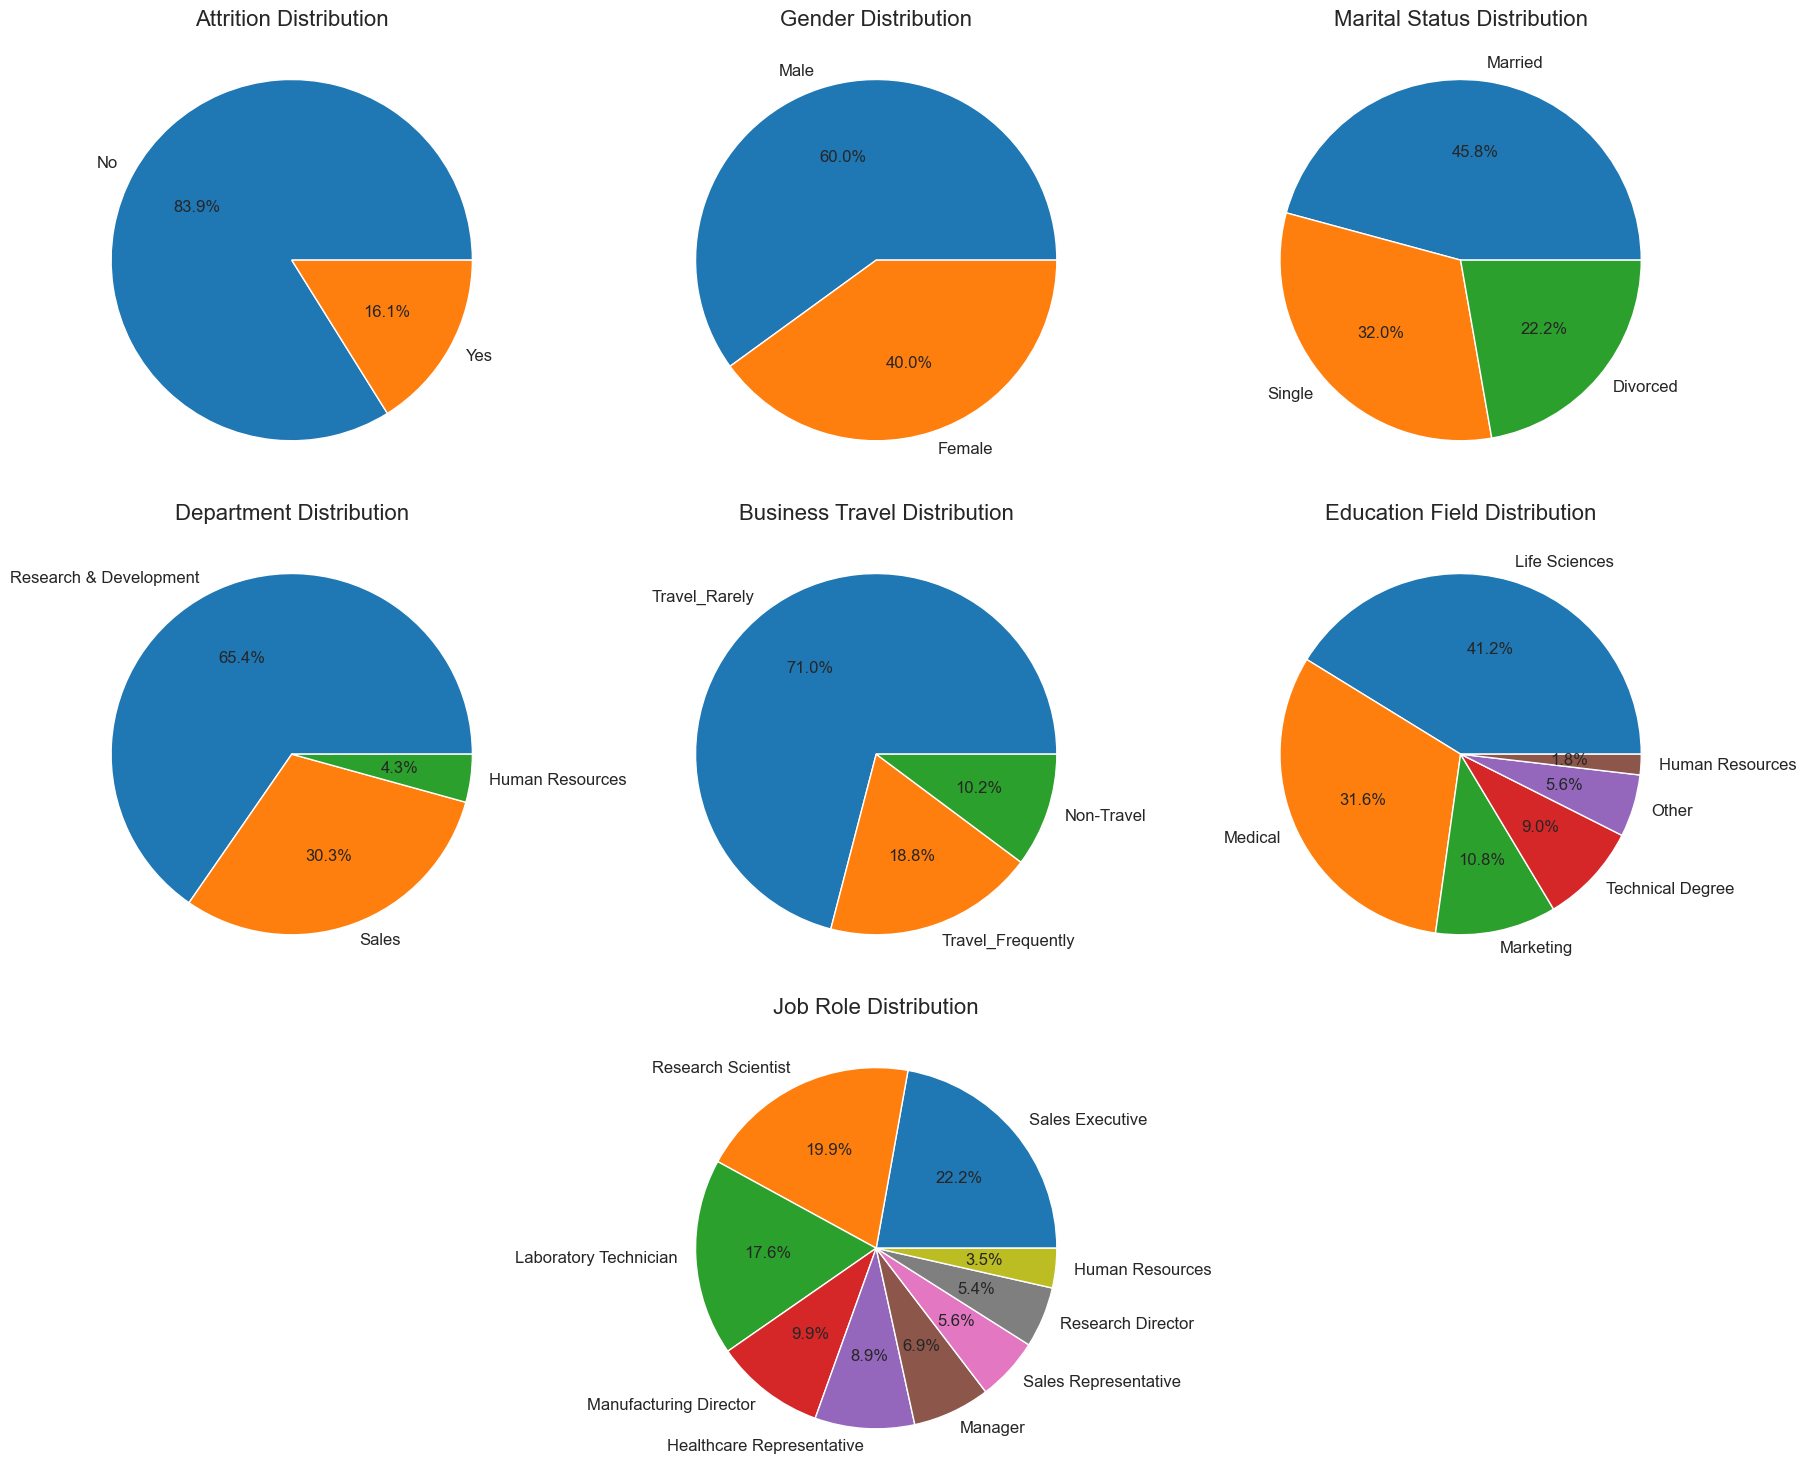

In [21]:
# Visualizing the Distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Attrition
axes[0, 0].pie(attrition_dist, labels=attrition_dist.index, autopct='%1.1f%%')
axes[0, 0].set_title('Attrition Distribution');

# Gender
axes[0, 1].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
axes[0, 1].set_title('Gender Distribution');

# Marital Status
axes[0, 2].pie(marital_dist, labels=marital_dist.index, autopct='%1.1f%%')
axes[0, 2].set_title('Marital Status Distribution');

# Department
axes[1, 0].pie(department_dist, labels=department_dist.index, autopct='%1.1f%%')
axes[1, 0].set_title('Department Distribution');

# Business Travel
axes[1, 1].pie(business_travel_dist, labels=business_travel_dist.index, autopct='%1.1f%%')
axes[1, 1].set_title('Business Travel Distribution');

# Education Field 
axes[1, 2].pie(education_dist, labels=education_dist.index, autopct='%1.1f%%')
axes[1, 2].set_title('Education Field Distribution');

# Job Role
axes[2, 1].pie(job_role_dist, labels=job_role_dist.index, autopct='%1.1f%%')
axes[2, 1].set_title('Job Role Distribution');

# Turning axes off
axes[2, 0].axis('off');
axes[2, 2].axis('off');

plt.tight_layout()

The frequency distribution visualization of various categorical columns reveals the following insights:

- 16% of employees have left the company, including those who resigned or were laid off.
- The company employs 40% male and 60% female workers.
- Approximately 46% of employees are married, 32% are single, and 22% are divorced.
- The research and development department has the highest number of employees.
- Business travel is uncommon among the company's employees.
- Over 70% of the company's employees have backgrounds in life sciences and medicine.
- The company has a higher number of employees in roles such as sales executive, research scientist, and laboratory technician.

### `Attrition by each Department`

In [22]:
employee_df.Department.value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

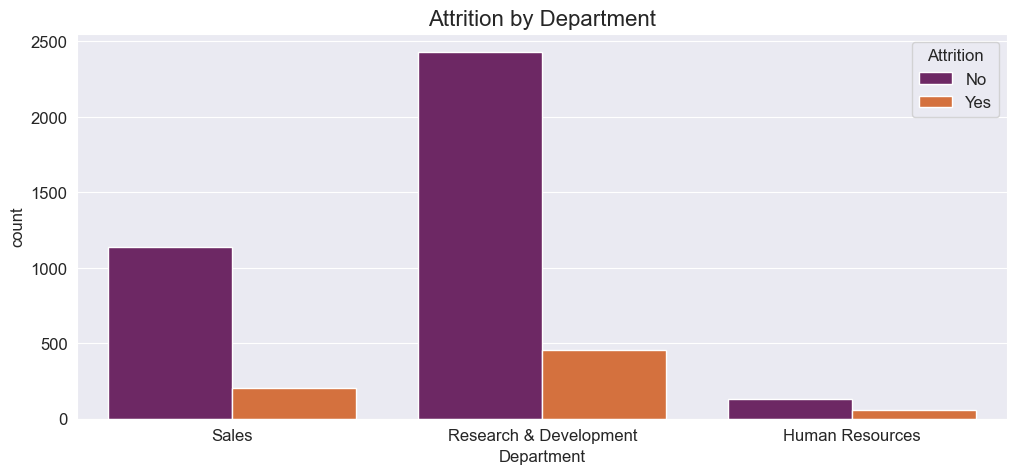

In [23]:
plt.figure(figsize=(12,5))
plt.title("Attrition by Department")

sns.countplot(x='Department',
              hue='Attrition',
              palette='inferno',
              data=employee_df);

In [24]:
employee_df['count'] = 1
department_count = employee_df.groupby(['Department', 'Attrition']).agg({"count":"sum"})
department_count

count
Department             Attrition       
Human Resources        No           132
                       Yes           57
Research & Development No          2430
                       Yes          453
Sales                  No          1137
                       Yes          201

The number of employees who left the company is high in R&D Department, this can be because the number of employees is high in R&D department.

In [25]:
# Dropping the count column 
employee_df.drop(columns='count', inplace=True)

### Attrition percent in all departments

In [26]:
department_attrition_counts = round(employee_df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100, 2).applymap(lambda x: str(x) + '%')
department_attrition_counts

Attrition,No,Yes
Department,,
Human Resources,69.84%,30.16%
Research & Development,84.29%,15.71%
Sales,84.98%,15.02%


When we compare the attrition percent of all the departments then the HR department has higher attrition percentage compared to others.

## Attrition by Employee Demographics

Employee demographics typically include characteristics such as age, gender, ethnicity, education level, job title, tenure, and marital status.

### `Attrition by Age`

First, let's see the distribution of Age with the help of distribution plot.

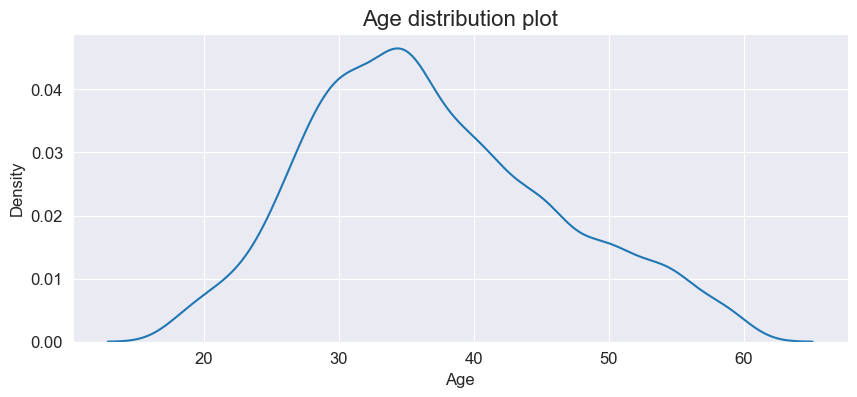

In [27]:
# Age distribution plot
plt.figure(figsize=(10,4))
plt.title('Age distribution plot')
sns.distplot(x=employee_df.Age,
             hist=False)
plt.xlabel('Age');

According to the Age distribution plot, most of the employees are in the range of 25-40 years of Age. 

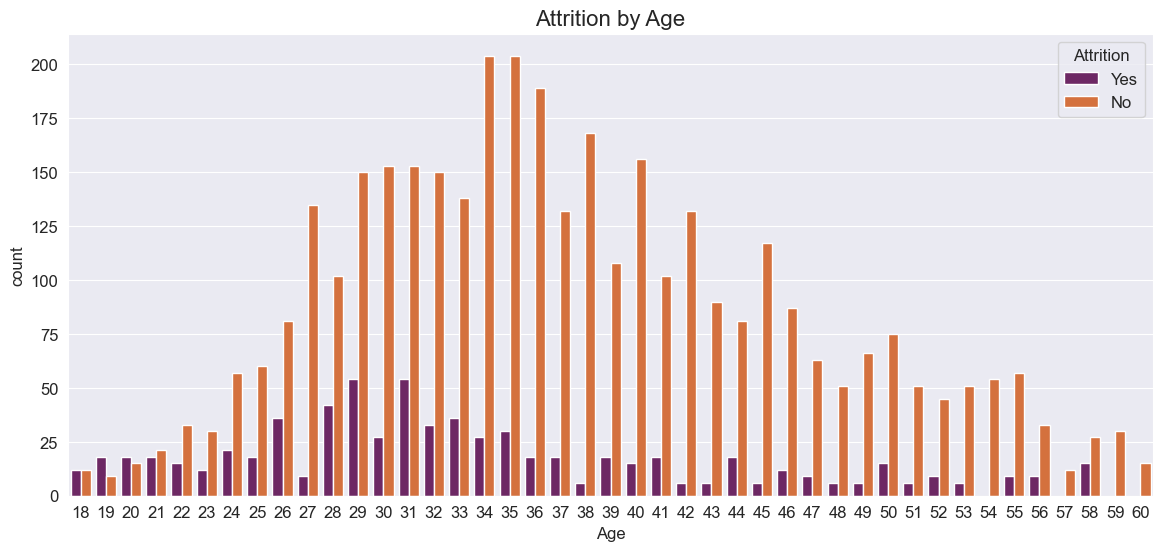

In [28]:
# Attrition by Age
plt.figure(figsize=(14,6))
plt.title('Attrition by Age')
sns.countplot(x='Age',
              hue='Attrition',
              data=employee_df,
              palette='inferno');

- There is a noticeable peak in attrition among individuals aged 28-31, where the number of people leaving is significantly higher.

- After the age of 31, the attrition rate generally decreases, suggesting increased job satisfaction or stability as employees grow older or gain more experience.

These insights can be valuable for human resource strategies, indicating potential areas to focus on for retention efforts, particularly among younger employees who are in the age range where attrition peaks.

### `Attrition by Gender`

Analyzing the Attrition by gender also gives the answer of any discrimination in the company

In [29]:
employee_df.Gender.value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

In [30]:
gender_count = employee_df.groupby('Gender')['Attrition'].value_counts().unstack()
gender_count

Attrition,No,Yes
Gender,,
Female,1494,270
Male,2205,441


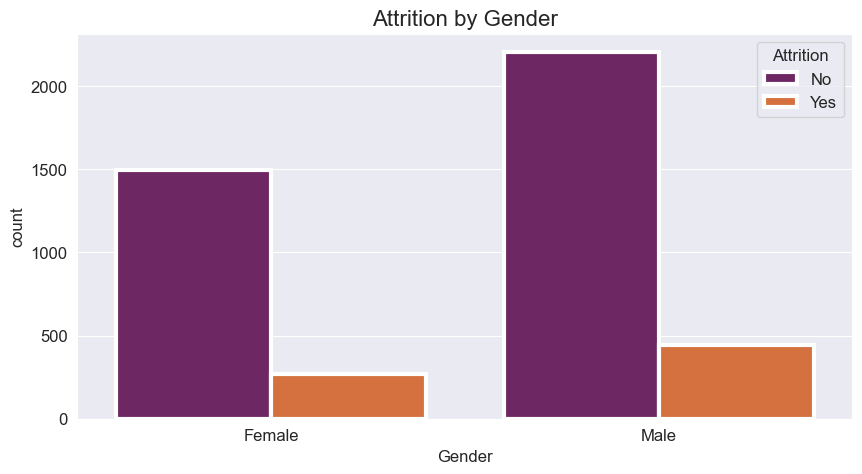

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Attrition by Gender')
sns.countplot(x='Gender',
              hue='Attrition',
              data=employee_df,
              palette='inferno',
              linewidth=3);

The Male employees are more in numbers compared to the Female employees so let's check the attrition percent and compare them

### Attrition percent by Gender

In [32]:
# Attrition percent in Male
print('Attrition percent in Male:', round(441*100/2646, 2), '%') 

# Attrition percent in Female
print('Attrition percent in Female:', round(270*100/1764, 2), '%') 

Attrition percent in Male: 16.67 %
Attrition percent in Female: 15.31 %


The Attrition percent among Male and Female is quite close to each other and this does not shows the gender discrimination in the company

### `Attrition by Employee Job Role`

In [33]:
employee_df.JobRole.value_counts()

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64

In [63]:
jobrole_count = employee_df.groupby('JobRole')['Attrition'].value_counts().unstack().sort_values(by='Yes', ascending=False)
jobrole_count

Attrition,No,Yes
JobRole,,
Sales Executive,813,165
Research Scientist,717,159
Laboratory Technician,651,126
Healthcare Representative,336,57
Research Director,183,57
Manufacturing Director,387,48
Manager,264,42
Sales Representative,213,36
Human Resources,135,21


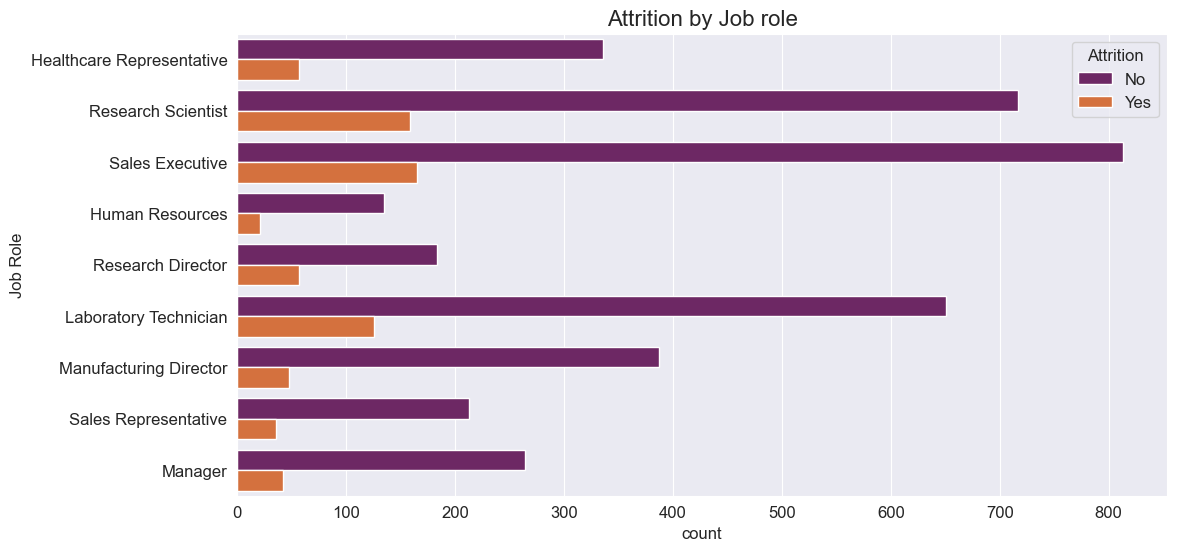

In [78]:
plt.figure(figsize=(12, 6))
plt.title('Attrition by Job role')
sns.countplot(y='JobRole',
              hue='Attrition',
              data=employee_df,
              palette='inferno')
plt.ylabel('Job Role');

### Attrition percent by Job Role

In [62]:
jobrole_percent = round(employee_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100, 2).applymap(lambda x : str(x) + '%')
jobrole_percent.sort_values(by='Yes', ascending=False)

Attrition,No,Yes
JobRole,,
Research Director,76.25%,23.75%
Research Scientist,81.85%,18.15%
Sales Executive,83.13%,16.87%
Laboratory Technician,83.78%,16.22%
Healthcare Representative,85.5%,14.5%
Sales Representative,85.54%,14.46%
Manager,86.27%,13.73%
Human Resources,86.54%,13.46%
Manufacturing Director,88.97%,11.03%


As seen in the graph the maximum number of employees are having job role as Sales Executive, Research Scientist, and Laboratory Technician.

However, the Attrition rate is highest in the Research Director role. Now let's analyze the gender and age of the employee having the job role of Research Director

In [37]:
rd_count = employee_df[employee_df['JobRole'] == 'Research Director'][employee_df['Attrition'] == 'Yes'][['Gender', 'Age']].reset_index(drop=True)
rd_count.head()

,Gender,Age
0,Female,33
1,Male,33
2,Male,34
3,Female,32
4,Male,45


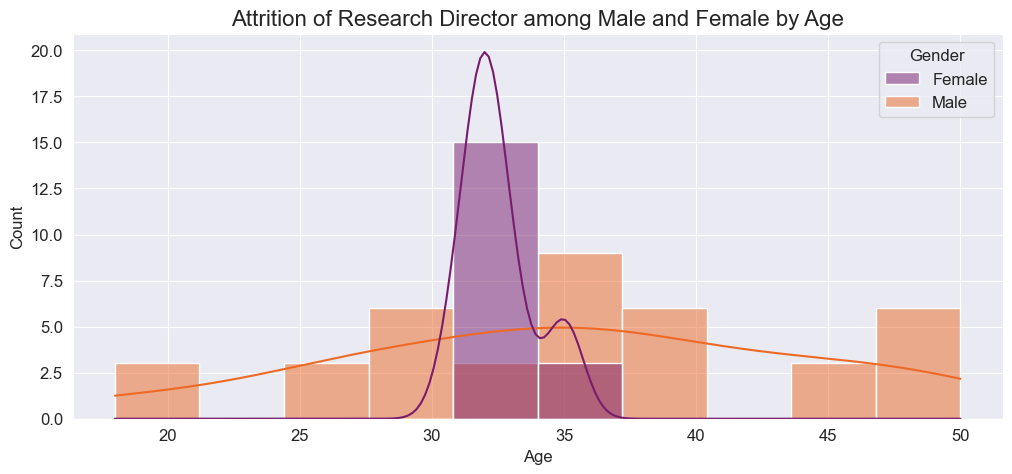

In [38]:
plt.figure(figsize=(12, 5))
plt.title('Attrition of Research Director among Male and Female by Age')
sns.histplot(x=rd_count.Age,
            hue=rd_count.Gender,
            kde=True,
            bins=10,
            palette='inferno');

- For female Research Directors, the spike at age 31-35 suggests a critical point in their career trajectory or personal life that may influence their decision to leave their positions.

- The relatively flat trend for males suggests that age may not be as significant a factor in their attrition compared to females.

This need the further investigation into the reasons behind the significant attrition rate for female Research Directors around the age of 31-35. It might be related to career development opportunities, work-life balance challenges, or other personal or professional factors. Understanding these reasons could help organizations develop targeted retention strategies for Research Directors, especially for females around the age of 35.

### `Attrition by MonthlyIncome`

In [39]:
income_counts = employee_df.MonthlyIncome.value_counts().reset_index()
income_counts.columns = ['MonthlyIncome', 'Count']
income_counts

,MonthlyIncome,Count
0,23420,12
1,61420,9
2,27410,9
3,26100,9
4,23800,9
...,...,...
1344,120610,3
1345,56740,3
1346,96130,3
1347,69290,3


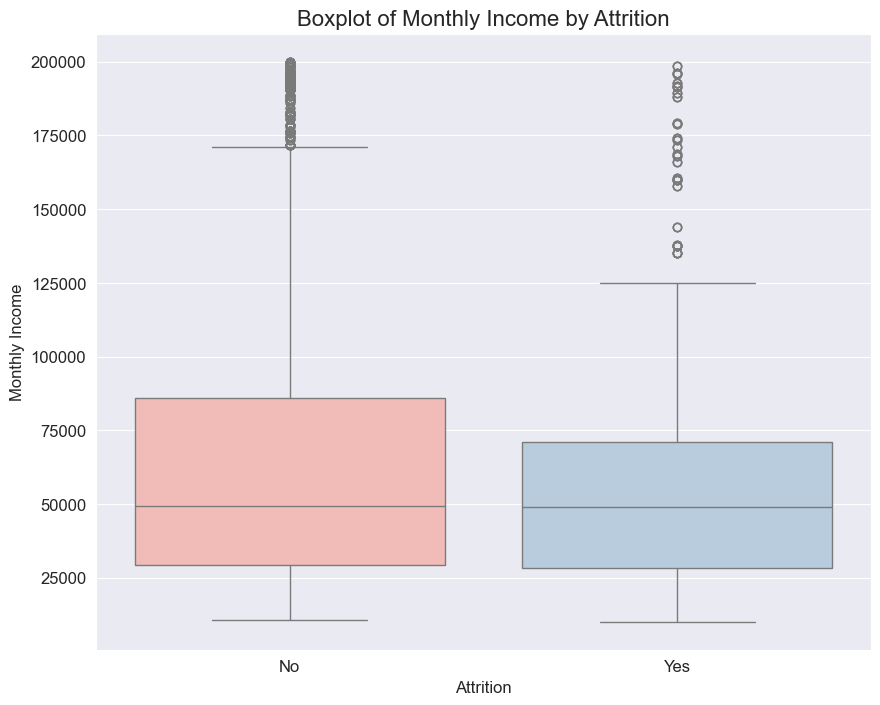

In [40]:
plt.figure(figsize=(10, 8))
plt.title('Boxplot of Monthly Income by Attrition')
sns.boxplot(x='Attrition',
            y='MonthlyIncome',
            data=employee_df,
            palette='Pastel1')
plt.ylabel('Monthly Income');

The boxplot tells about the monthly income by attrition, where it shows:

- Median monthly income for the employees who have attrited is lower than than the median monthly income for the employees who have not attrited. This means that the employees with lower monthly incomes are more likely to attrit (leave the comapny).

- The box in the boxplot of 'No' and 'Yes' suggests the wider and lower spread of income respectively. This indicates more variability in the employees income. The 'Yes' group of attrition has narrower spread, suggesting less variability in the incomes of employees who have left the company.

- The presence of several high outliers in the 'No' group suggests that there are individuals with significantly higher incomes than the typical group member. The 'Yes' group has fewer outliers, indicating less extreme variation from the median.

In [41]:
rd_income_count = employee_df[employee_df['JobRole'] == 'Research Director'][employee_df['Attrition'] == 'Yes'][['MonthlyIncome', 'Gender', 'Age', 'EnvironmentSatisfaction']]
rd_income_count.head()

,MonthlyIncome,Gender,Age,EnvironmentSatisfaction
177,67280,Female,33,2.0
178,66520,Male,33,1.0
182,20010,Male,34,2.0
211,32980,Female,32,4.0
246,34410,Male,45,1.0


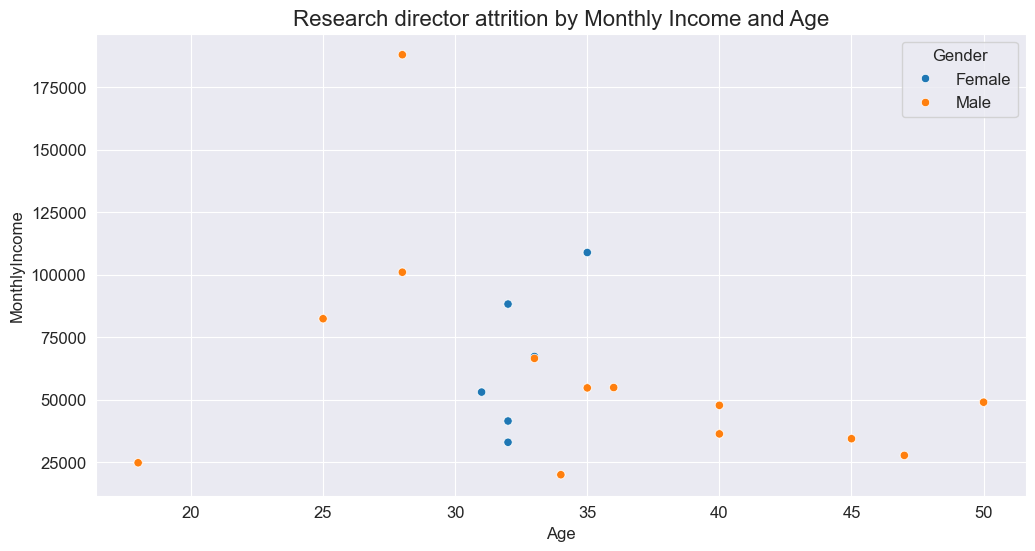

In [42]:
plt.figure(figsize=(12,6))
plt.title('Research director attrition by Monthly Income and Age')
sns.scatterplot(x='Age',
                y='MonthlyIncome',
                hue='Gender',
                data=rd_income_count);

As per the analysis, it is evident that the monthly income of male Research Directors who have left the organization increases from the age of 27 but gradually decreases from the age of 32. This indicates that low monthly income could be one of the reasons for attrition among research directors. However, in the case of female research directors, the attrition rate is higher between the ages of 30 to 35 than that of male employees. 

To understand the reasons behind this, we need to analyze more factors.

Let's Analyze the Environment Satisfaction among the male and female Research directors.

In [43]:
employee_df.EnvironmentSatisfaction.value_counts()

EnvironmentSatisfaction
3.0    1350
4.0    1334
2.0     856
1.0     845
Name: count, dtype: int64

In [44]:
satisfaction_rating = {1:'Poor',
                       2:'Below Average',
                       3:'Average',
                       4:'Good',
                       5:'Excellent'}

In [45]:
employee_df['Count'] = 1
env_satisfaction_gender = employee_df.groupby(['EnvironmentSatisfaction', 'Gender']).agg({"Count":"sum"})
env_satisfaction_gender

Count
EnvironmentSatisfaction Gender       
1.0                     Female    297
                        Male      548
2.0                     Female    379
                        Male      477
3.0                     Female    539
                        Male      811
4.0                     Female    543
                        Male      791

In [46]:
env_satisfaction_gender.groupby('Gender').sum()

,Count
Gender,
Female,1758
Male,2627


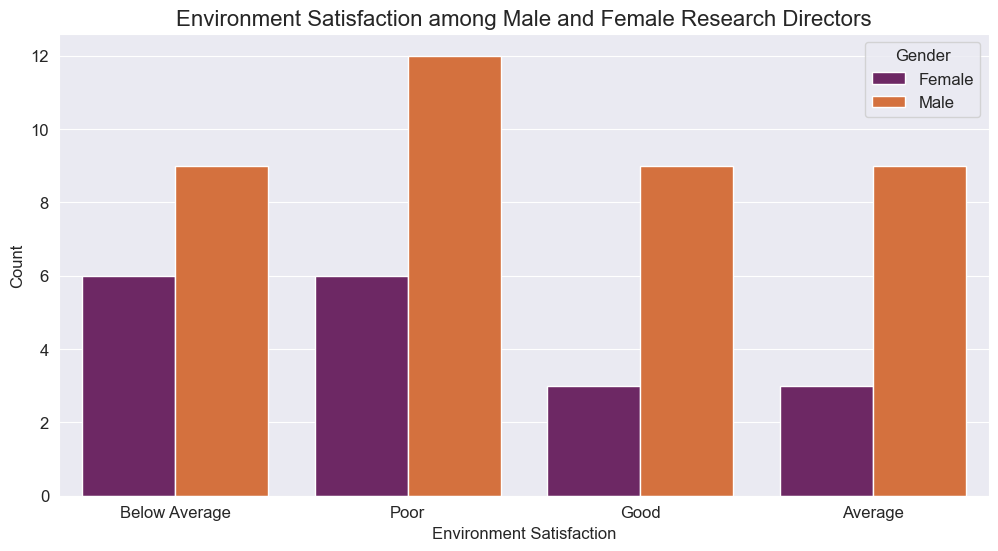

In [47]:
plt.figure(figsize=(12,6))
plt.title('Environment Satisfaction among Male and Female Research Directors')
sns.countplot(x=rd_income_count['EnvironmentSatisfaction'].map(satisfaction_rating),
             hue='Gender',
             data=rd_income_count,
             palette='inferno')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count');

In [88]:
environment_sat_gender = round(employee_df.groupby('EnvironmentSatisfaction')[['Gender', 'Attrition']].value_counts(normalize=True).unstack() * 100, 2).applymap(lambda x : str(x) + '%')
environment_sat_gender

Attrition                           No     Yes
EnvironmentSatisfaction Gender                
1.0                     Female  25.92%   9.23%
                        Male    48.88%  15.98%
2.0                     Female  37.03%   7.24%
                        Male    48.01%   7.71%
3.0                     Female  35.26%   4.67%
                        Male    50.96%   9.11%
4.0                     Female  35.76%   4.95%
                        Male    50.82%   8.47%

The data indicates that a higher number of females expressed dissatisfaction in the Poor and Below-average category compared to males. 
Additionally, more employees expressed dissatisfaction in the Below Average and Poor categories than in the Good and Average categories. 

Therefore, it can be concluded that both male and female research directors are dissatisfied with the company's work environment.

In [49]:
employee_df.drop(columns='Count', inplace=True)

### `Business Travel by Department`

In [50]:
employee_df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

In [51]:
employee_df['Count'] = 1
business_travel = employee_df.groupby(['BusinessTravel', 'Department']).agg({'Count':'sum'})
business_travel

Count
BusinessTravel    Department                   
Non-Travel        Human Resources             9
                  Research & Development    330
                  Sales                     111
Travel_Frequently Human Resources            24
                  Research & Development    519
                  Sales                     288
Travel_Rarely     Human Resources           156
                  Research & Development   2034
                  Sales                     939

In [52]:
employee_df.Department.value_counts(normalize=True) * 100

Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64

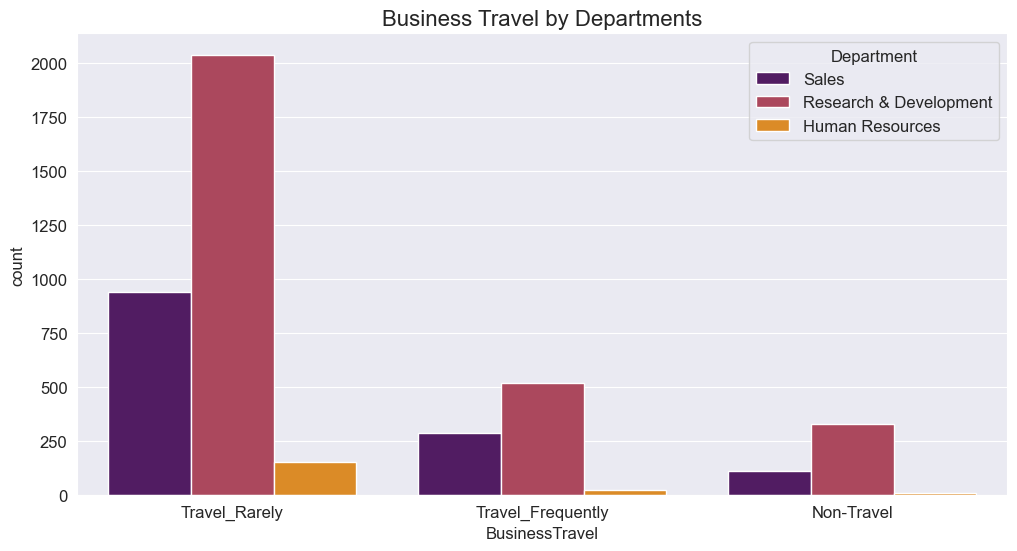

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='BusinessTravel',
              hue='Department',
              data=employee_df,
              palette='inferno')
plt.title('Business Travel by Departments');

Now let's check the years in the current company of the attrited and non-attrited employees

### `Years in the Company`

In [54]:
employee_df['Count'] = 1
years_at_company = employee_df.groupby(['YearsAtCompany', 'Attrition']).agg({'Count':'sum'})
years_at_company

Count
YearsAtCompany Attrition       
0              No            84
               Yes           48
1              No           336
               Yes          177
2              No           300
...                         ...
33             Yes            3
34             No             3
36             No             6
37             No             3
40             Yes            3

[64 rows x 1 columns]

In [55]:
years_count = employee_df.YearsAtCompany.value_counts()
years_count.head(10)

YearsAtCompany
5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
Name: count, dtype: int64

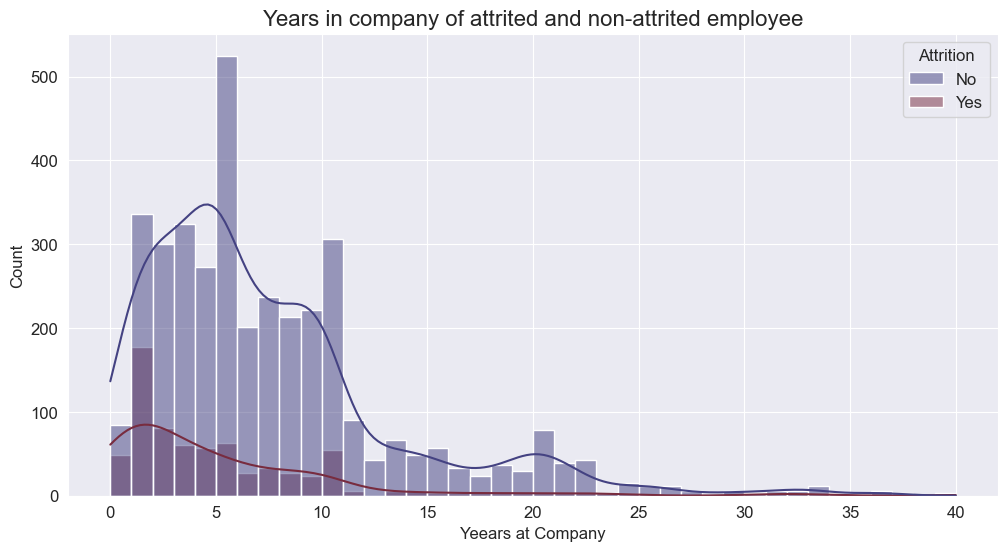

In [89]:
plt.figure(figsize=(12,6))
plt.title('Years in company of attrited and non-attrited employee')
sns.histplot(x='YearsAtCompany',
             hue='Attrition',
             data=employee_df,
             kde=True,
             bins=40,
             palette='icefire')
plt.xlabel('Yeears at Company');

The histogram presented in the graph above provides us with some insights. 
- It shows that employees who left the company had worked for approximately 2-3 years, which is indicated by the peak in the graph at this point.
- On the other hand, the histogram also indicates that employees who did not leave the company had worked for around 5-10 years. This suggests that very few employees leave the company after this period.

### `Attrition by Marital Status`

In [57]:
employee_df.MaritalStatus.value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64

In [58]:
marital_status_count = round(employee_df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack() * 100, 2)
marital_status_count

Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


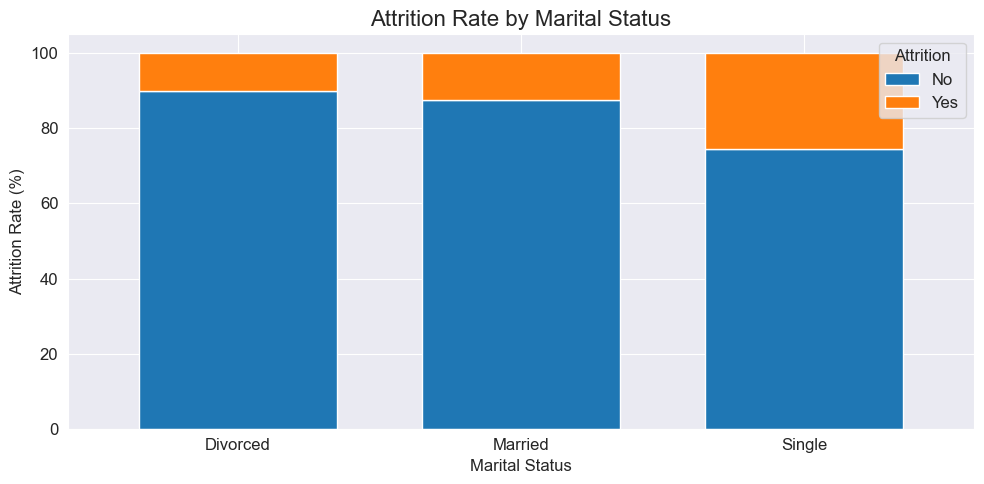

In [59]:
# Visualization
marital_status_count.plot(kind='bar',
                         stacked=True,
                         figsize=(10, 5),
                         width=0.7)
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout();

Upon analysis, it has been observed that the attrition rate is highest among single employees. This may be due to the fact that most of the single employees are in the early stages of their careers and are more likely to seek out new opportunities.

On the other hand, married employees are found to have a lower attrition rate when compared to single employees. This could be attributed to the need for stability in their jobs, as they may have additional responsibilities such as providing for their families.

Lastly, the attrition rate of divorced employees is significantly lower when compared to single and married employees. It is possible that the number of divorced employees in the company is less than that of single and married employees, which could contribute to the lower attrition rate.

### Finding Relationships

Let's examine the relationship between Job Satisfaction, Environment Satisfaction, Work-Life Balance, Job Involvement, Performance Rating and Attrition

In [60]:
# Creating different data-frame by attrition and non-attrition
attrition_yes = employee_df[employee_df['Attrition'] == 'Yes']
attrition_no = employee_df[employee_df['Attrition'] == 'No']

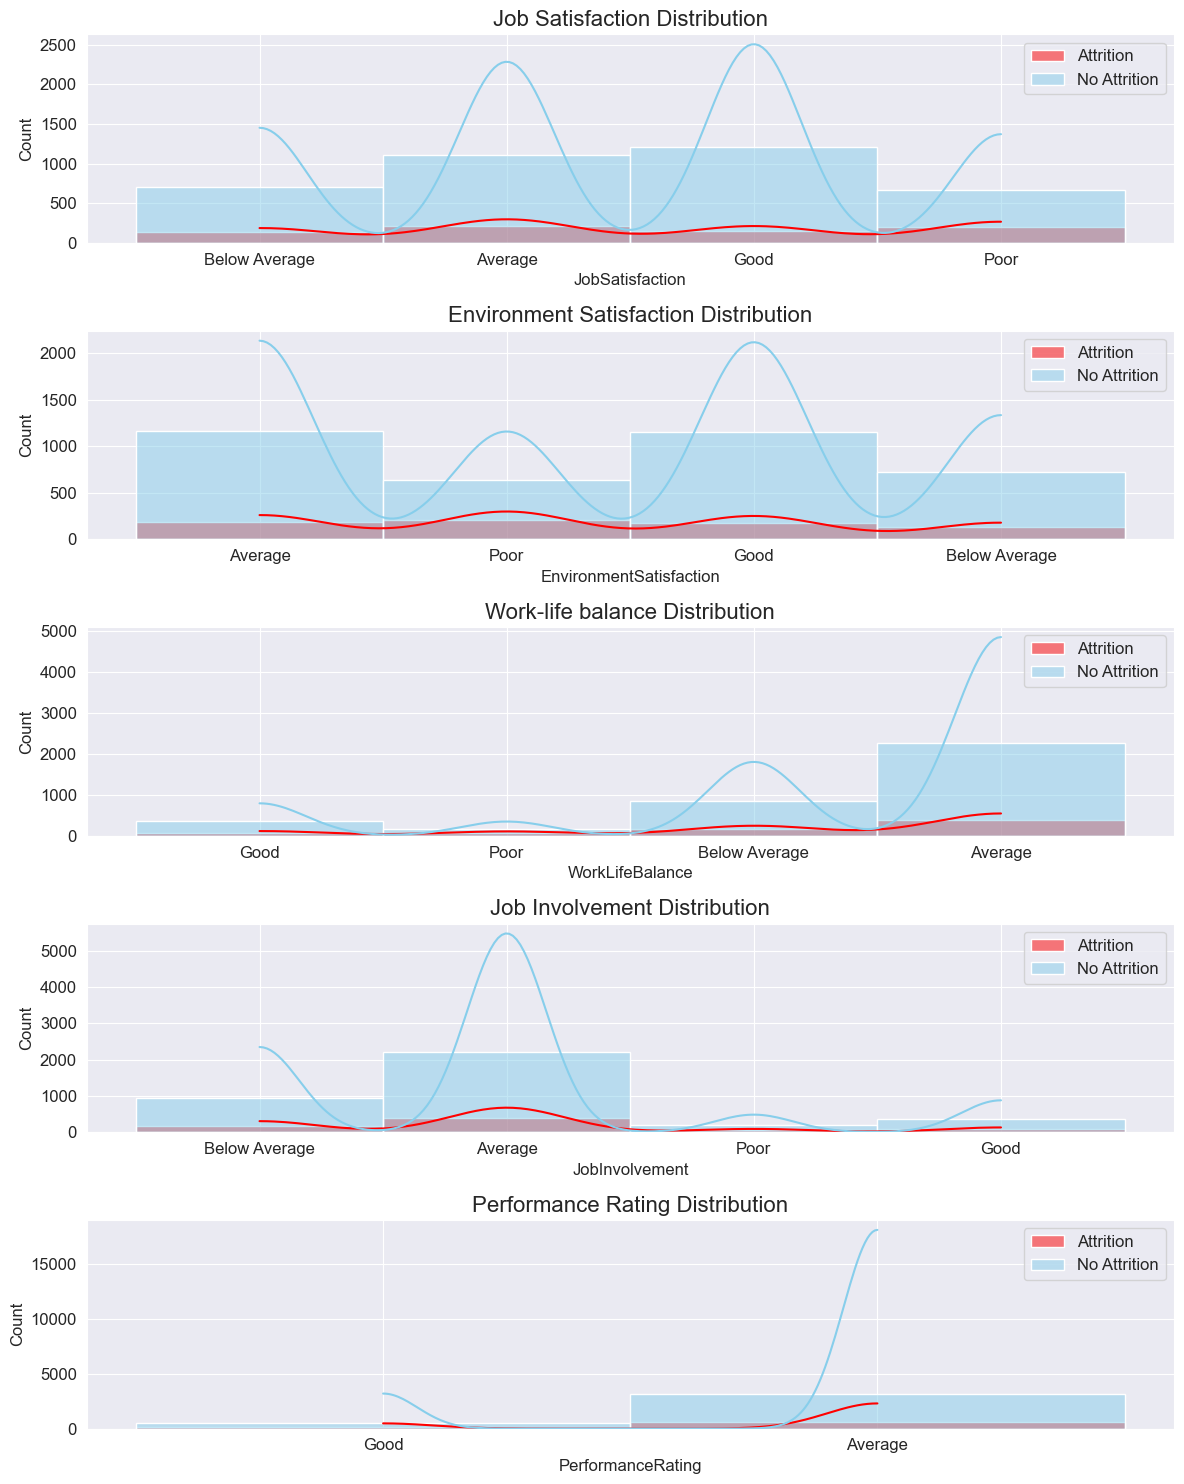

In [61]:
# Creating subplots 
fig, axes = plt.subplots(5,1, figsize=(12, 15))

# Job Satisfaction
sns.histplot(attrition_yes['JobSatisfaction'].map(satisfaction_rating), bins=4, label='Attrition', color='red', kde=True, ax=axes[0])
sns.histplot(attrition_no['JobSatisfaction'].map(satisfaction_rating), bins=4, label='No Attrition', color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Job Satisfaction Distribution')
axes[0].legend()

# Environment Satisfaction
sns.histplot(attrition_yes['EnvironmentSatisfaction'].map(satisfaction_rating), bins=4, label='Attrition', color='red', kde=True, ax=axes[1])
sns.histplot(attrition_no['EnvironmentSatisfaction'].map(satisfaction_rating), bins=4, label='No Attrition', color='skyblue', kde=True, ax=axes[1])
axes[1].set_title('Environment Satisfaction Distribution')
axes[1].legend()

# Work life balance
sns.histplot(attrition_yes['WorkLifeBalance'].map(satisfaction_rating), bins=4, label='Attrition', color='red', kde=True, ax=axes[2])
sns.histplot(attrition_no['WorkLifeBalance'].map(satisfaction_rating), bins=4, label='No Attrition', color='skyblue', kde=True, ax=axes[2])
axes[2].set_title('Work-life balance Distribution')
axes[2].legend()

# Job Involvement
sns.histplot(attrition_yes['JobInvolvement'].map(satisfaction_rating), bins=4, label='Attrition', color='red', kde=True, ax=axes[3])
sns.histplot(attrition_no['JobInvolvement'].map(satisfaction_rating), bins=4, label='No Attrition', color='skyblue', kde=True, ax=axes[3])
axes[3].set_title('Job Involvement Distribution')
axes[3].legend()

# Performance Rating
sns.histplot(attrition_yes['PerformanceRating'].map(satisfaction_rating), bins=4, label='Attrition', color='red', kde=True, ax=axes[4])
sns.histplot(attrition_no['PerformanceRating'].map(satisfaction_rating), bins=4, label='No Attrition', color='skyblue', kde=True, ax=axes[4])
axes[4].set_title('Performance Rating Distribution')
axes[4].legend()

plt.tight_layout();

# **Insights gained from the analysis**

The following are some important details about the company's employees:

- The attrition rate in the company is about 16%.
- Of all employees, 40% are female and 60% are male.
- Employees' ages range from 25 to 40 years old.
- Approximately 46% of employees are married, 32% are single, and 22% are divorced.
- The Research and Development Department employs 65% of the company's workforce.
- The Research and Development Department has the highest number of employees who have faced attrition.
- The Human Resources Department has the highest attrition rate at approximately 31%, followed by the Research and Development Department at approximately 16%, and the Sales Department at approximately 15%.
- Employees aged between 28-31 years have a significantly higher attrition rate, which decreases after the age of 31.
- The Research Director role in the company has a higher attrition rate compared to other roles.
- The attrition rate among female Research Directors spikes between the ages of 31-35.
- The company employees are dissatisfied with the company's environment.